# 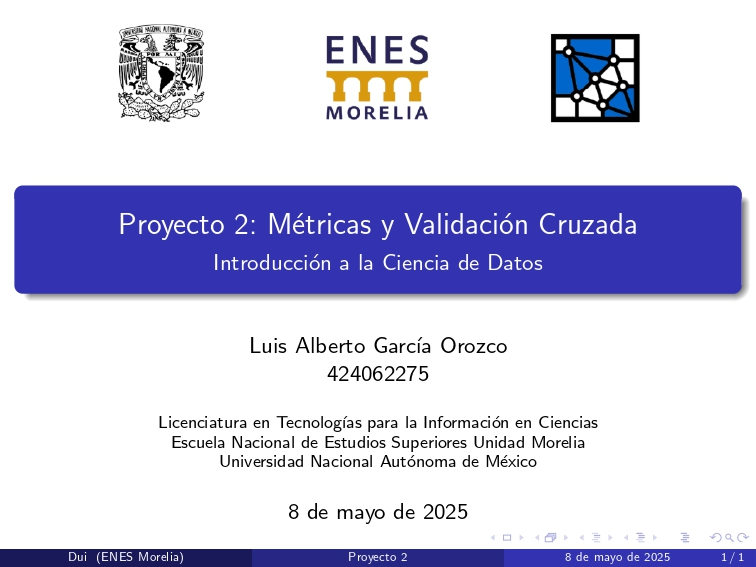

# Importaciones y funciones

En esta sección se importara lo necesario para el proyecto, y se prepararan las variables principales como la que almacena la base de datos.

In [1]:
import numpy as np                # Estas son las librerias principales del proyecto
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'cia_paises.xlsx'      # Se almacena la base de datos como "df"
df = pd.read_excel(filename)
df

Name    Continent             Area (km²)  Population  \
0       Afghanistan         Asia                 652230    37466414   
1          Akrotiri  Middle East                    123       18195   
2           Albania       Europe                  28748     3088385   
3           Algeria       Africa                2381740    43576691   
4    American Samoa      Oceania                    224       46366   
..              ...          ...                    ...         ...   
249       West Bank  Middle East                   5860     2949246   
250           World        World  510.072 million sq km  7772850805   
251           Yemen  Middle East                 527968    30399243   
252          Zambia       Africa                 752618    19077816   
253        Zimbabwe       Africa                 390757    14829988   

     GDP (USD)  Unemployment Rate  Taxes (% of GDP)  External Debt (USD)  \
0         2065              23.90             23.90                  7.0   
1            0                NaN               NaN                  NaN   
2        13965               5.83              5.83                 71.8   
3        11511              11.70             11.70                 27.5   
4        11200              29.80             29.80                 12.2   
..         ...                ...               ...                  ...   
249       6220              27.90             27.90                 24.4   
250      17500               7.70              7.70                 67.2   
251       2500              27.00             27.00                 74.5   
252       3470              15.00             15.00                 63.1   
253       2836              11.30             11.30                 82.3   

     Exchange Rate (USD)  Internet Users  \
0                 7.8700    4.717013e+06   
1                 0.8850             NaN   
2               102.4300    2.196613e+06   
3               131.0850    2.481953e+07   
4                 1.0000    1.700000e+04   
..                   ...             ...   
249               3.6060    2.673000e+06   
250                  NaN    3.960000e+09   
251             275.0000    7.659884e+06   
252              21.0650    2.351646e+06   
253              82.3138    3.796618e+06   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
0                                      13.50      46.0        34903.0   
1                                        NaN       1.0            NaN   
2                                      71.85       3.0         3945.0   
3                                      59.58     149.0       104000.0   
4                                      31.30       3.0          241.0   
..                                       ...       ...            ...   
249                                    57.40       2.0         4686.0   
250                                    51.00   41820.0     64285009.0   
251                                    26.72      57.0        71300.0   
252                                    14.30      88.0        67671.0   
253                                    27.06     196.0        97267.0   

     Militar Expenditures (% of GDP)  
0                               1.20  
1                                NaN  
2                               1.30  
3                               6.00  
4                                NaN  
..                               ...  
249                              NaN  
250                             2.21  
251                             4.30  
252                             1.20  
253                             0.70  

[254 rows x 14 columns]

# Data Wrangling
En esta sección se exploraran los datos y se dejaran listos para su uso en este proyecto.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     254 non-null    object 
 1   Continent                                254 non-null    object 
 2   Area (km²)                               254 non-null    object 
 3   Population                               254 non-null    object 
 4   GDP (USD)                                254 non-null    int64  
 5   Unemployment Rate                        220 non-null    float64
 6   Taxes (% of GDP)                         220 non-null    float64
 7   External Debt (USD)                      212 non-null    float64
 8   Exchange Rate (USD)                      239 non-null    float64
 9   Internet Users                           230 non-null    float64
 10  Internet Users Percentage of Population  230 non-n

## Datos atípicos
En esta sub-sección se localizan y se eliminan los datos atípicos de la base de datos

In [4]:
outliers_idx = df[df['GDP (USD)'] < 50].index
outliers_idx                       # Se guardan los indices de los outliers en el GPD

Index([  1,   8,  13,  30,  32,  48,  49,  50,  56,  65,  84, 101, 102, 116,
       158, 167, 176, 180, 188, 208, 210, 213, 217, 240, 247],
      dtype='int64')

In [5]:
df.drop(outliers_idx, axis = 0, inplace = True)
df[df['GDP (USD)'] < 50]       

Empty DataFrame
Columns: [Name, Continent, Area (km²), Population, GDP (USD), Unemployment Rate, Taxes (% of GDP), External Debt (USD), Exchange Rate (USD), Internet Users, Internet Users Percentage of Population, Airports, Roadways (km), Militar Expenditures (% of GDP)]
Index: []

## Revisión de datos:

### Continent

Y para facilitar el trabajo a los modelos, a la columna continente la convertiremos del tipo numérica.

In [6]:
col = 'Continent'
df[col].unique()  ## para esto usaremos la función get_dummies al final

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Central America and the Caribbean', 'South America',
       'Middle East', 'North America', 'Southeast Asia', 'European Union',
       'Arctic Region', 'AsiaEurope', 'World'], dtype=object)

In [7]:
df[df[col] == 'World'] ## 510072000 parece un dato de área muy atípico, en general considerar World es
                               ## inecesario

Name Continent             Area (km²)  Population  GDP (USD)  \
250  World     World  510.072 million sq km  7772850805      17500   

     Unemployment Rate  Taxes (% of GDP)  External Debt (USD)  \
250                7.7               7.7                 67.2   

     Exchange Rate (USD)  Internet Users  \
250                  NaN    3.960000e+09   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
250                                     51.0   41820.0     64285009.0   

     Militar Expenditures (% of GDP)  
250                             2.21

In [8]:
df = df.drop(250)
df[df[col] == 'World']

Empty DataFrame
Columns: [Name, Continent, Area (km²), Population, GDP (USD), Unemployment Rate, Taxes (% of GDP), External Debt (USD), Exchange Rate (USD), Internet Users, Internet Users Percentage of Population, Airports, Roadways (km), Militar Expenditures (% of GDP)]
Index: []

In [9]:
df[df[col] == 'European Union']

Name       Continent       Area (km²) Population  GDP (USD)  \
77  European Union  European Union  4,236,351 sq km  450131902      44436   

    Unemployment Rate  Taxes (% of GDP)  External Debt (USD)  \
77                8.6               8.6                 86.8   

    Exchange Rate (USD)  Internet Users  \
77                0.885     398100000.0   

    Internet Users Percentage of Population  Airports  Roadways (km)  \
77                                     85.0       NaN     10582653.0   

    Militar Expenditures (% of GDP)  
77                              1.4

### Area (km²)	

In [10]:
df = df.drop(77)
df[df[col] == 'European Union']

Empty DataFrame
Columns: [Name, Continent, Area (km²), Population, GDP (USD), Unemployment Rate, Taxes (% of GDP), External Debt (USD), Exchange Rate (USD), Internet Users, Internet Users Percentage of Population, Airports, Roadways (km), Militar Expenditures (% of GDP)]
Index: []

In [11]:
col = 'Area (km²)'
df[col].unique()

array([652230, 28748, 2381740, 224, 468, 1246700, 91, 443, 2780400, 29743,
       180, 7741220, 83871, 86600, 13880, 760, 148460, 430, 207600, 30528,
       22966, 112622, 54, 38394, 1098581, 51197, 581730, 8515770, 151,
       5765, 110879, 274200, 676578, 27830, 4033, 181035, 475440, 9984670,
       264, 622984, 1.284, 756102, 9596960, 1138910, 2235, 2344858,
       342000, 236, 51100, 322463, 56594, 110860, 444, 9251, 78867, 43094,
       23200, 751, 48670, 283561, 1001450, 21041, 28051, 117600, 45228,
       17364, 1104300, 12173, 1393, 18274, 338145, 643801, 4167, 267667,
       11300, 69700, 357022, 238533, 7, 131957, 2166086, 344, 544, 108889,
       78, 245857, 36125, 214969, 27750, 112090, 1108, 93028, 103000,
       3287263, 1904569, 1648195, 438317, 70273, 572, 21937, 301340,
       10991, 377915, 116, 89342, 2724900, 580367, 811, 120538, 99720,
       10887, 17818, 199951, 236800, 64589, 10400, 30355, 111369, 1759540,
       160, 65300, 2586, 28, 587041, 118484, 329847, 298

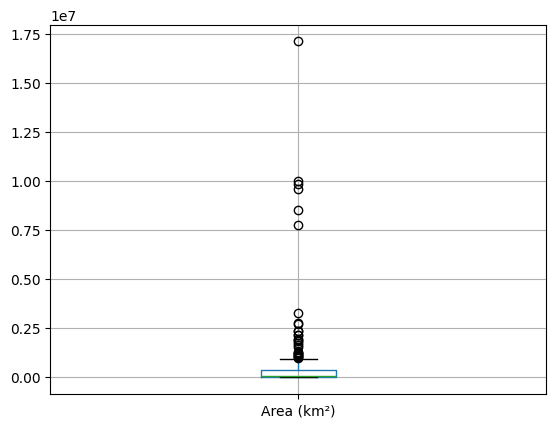

In [12]:
df[col] = df[col].astype('float64')
df.loc[:,[col]].boxplot()
plt.show()

In [13]:
df[df[col] > 0.1e7].sort_values(col)

Name       Continent  Area (km²)  \
70                               Egypt          Africa   1001450.0   
145                         Mauritania          Africa   1030700.0   
27                             Bolivia   South America   1098581.0   
76                            Ethiopia          Africa   1104300.0   
51                            Colombia   South America   1138910.0   
209                       South Africa          Africa   1219090.0   
142                               Mali          Africa   1240192.0   
6                               Angola          Africa   1246700.0   
178                               Peru   South America   1285216.0   
151                           Mongolia            Asia   1564116.0   
109                               Iran     Middle East   1648195.0   
133                              Libya          Africa   1759540.0   
215                              Sudan          Africa   1861484.0   
108                          Indonesia  Southeast Asia   1904569.0   
147                             Mexico   North America   1964375.0   
198                       Saudi Arabia     Middle East   2149690.0   
92                           Greenland   Arctic Region   2166086.0   
53   Congo, Democratic Republic of the          Africa   2344858.0   
3                              Algeria          Africa   2381740.0   
120                         Kazakhstan            Asia   2724900.0   
10                           Argentina   South America   2780400.0   
107                              India            Asia   3287263.0   
14                           Australia         Oceania   7741220.0   
31                              Brazil   South America   8515770.0   
47                               China            Asia   9596960.0   
239                      United States   North America   9833517.0   
42                              Canada   North America   9984670.0   
186                             Russia            Asia  17098242.0   

     Population  GDP (USD)  Unemployment Rate  Taxes (% of GDP)  \
70    106437241      11763               7.86              7.86   
145     4079284       5197              10.20             10.20   
27     11758869       8724               4.00              4.00   
76    110871031       2221              17.50             17.50   
51     50355650      14722              10.50             10.50   
209    56978635      12482              28.53             28.53   
142    20137527       2322               7.90              7.90   
6      33642646       6670               6.60              6.60   
178    32201224      12848               6.58              6.58   
151     3198913      12317               8.00              8.00   
109    85888910      12389              11.80             11.80   
133     7017224      15174              30.00             30.00   
215    46751152       3958              19.60             19.60   
108   275122131      11812               5.31              5.31   
147   130207371      19796               3.49              3.49   
198    34783757      46962               6.00              6.00   
92        57799      41800               9.10              9.10   
53    105044646       1098                NaN               NaN   
3      43576691      11511              11.70             11.70   
120    19245793      26351               4.80              4.80   
10     45864941      22064               9.84              9.84   
107  1339330514       6700               8.50              8.50   
14     25809973      49854               5.16              5.16   
31    213445417      14652              11.93             11.93   
47   1397897720      16117               3.64              3.64   
239   334998398      62530               3.89              3.89   
42     37943231      49031               5.67              5.67   
186   142320790      27044               4.60              4.60   

     External Debt (USD)  Exchange Rate (USD)  Internet Use

In [14]:
df[df[col] < 0.1e7].sort_values(col).head(10)

Name                          Continent  Area (km²) Population  \
164         Niger                             Africa       1.267   23605767   
45           Chad                             Africa       1.284   17414108   
150        Monaco                             Europe       2.000      31223   
90      Gibraltar                             Europe       7.000      29516   
227       Tokelau                            Oceania      12.000       1647   
157         Nauru                            Oceania      21.000       9770   
234        Tuvalu                            Oceania      26.000      11448   
137         Macau                     Southeast Asia      28.000     630396   
204  Sint Maarten  Central America and the Caribbean      34.000      44564   
192  Saint Martin  Central America and the Caribbean      54.000      32680   

     GDP (USD)  Unemployment Rate  Taxes (% of GDP)  External Debt (USD)  \
164       1225                0.3               0.3                 45.3   
45        1580                NaN               NaN                 52.5   
150     115700                2.0               2.0                  NaN   
90       61700                1.0               1.0                  7.5   
227       6004                2.0               2.0                  NaN   
157      11583               23.0              23.0                 62.0   
234       4281                NaN               NaN                 37.0   
137     123965                2.0               2.0                  0.0   
204      35342               12.0              12.0                  NaN   
192      19300                NaN               NaN                  NaN   

     Exchange Rate (USD)  Internet Users  \
164              605.300       1110778.0   
45               605.300       1029153.0   
150                0.885         29821.0   
90                 0.885         27823.0   
227                1.543           805.0   
157                1.311          5524.0   
234                1.311          5498.0   
137                8.000        508052.0   
204                1.790             NaN   
192                0.885          1100.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
164                                     5.25      30.0        18949.0   
45                                      6.50      59.0        40000.0   
150                                    97.05       NaN            NaN   
90                                     94.44       1.0           29.0   
227                                    60.20       NaN           10.0   
157                                    57.00       1.0           30.0   
234                                    49.32       1.0            8.0   
137                                    83.79       1.0          428.0   
204                                      NaN       1.0           53.0   
192                                     3.50       1.0            NaN   

     Militar Expenditures (% of GDP)  
164                              1.8  
45                               2.2  
150                              NaN  
90                               NaN  
227                              NaN  
157                              NaN  
234                              NaN  
137                              NaN  
204                              NaN  
192                              NaN

niger area = 1267000.0

chad area = 1284000.0

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
df.loc[[164, 45],[col]] *= int(1e6)
df.loc[[164, 45],[col]]

Area (km²)
164   1267000.0
45    1284000.0

### Population	

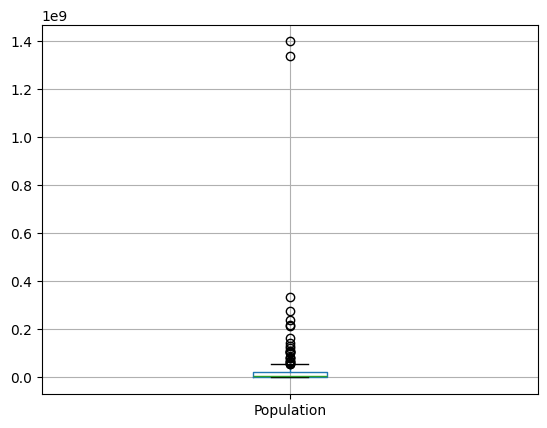

In [17]:
col = 'Population'
df[col] = df[col].astype('float64')
df.loc[:,[col]].boxplot()
plt.show()

In [18]:
df[df[col] > 0.05e9].sort_values(col)

Name       Continent  Area (km²)  \
51                            Colombia   South America   1138910.0   
124                       Korea, South            Asia     99720.0   
121                              Kenya          Africa    580367.0   
209                       South Africa          Africa   1219090.0   
37                               Burma  Southeast Asia    676578.0   
223                           Tanzania          Africa    947300.0   
114                              Italy          Europe    301340.0   
82                              France          Europe    643801.0   
224                           Thailand  Southeast Asia    513120.0   
88                             Germany          Europe    357022.0   
231                             Turkey     Middle East    783562.0   
109                               Iran     Middle East   1648195.0   
245                            Vietnam  Southeast Asia    331210.0   
53   Congo, Democratic Republic of the          Africa   2344858.0   
70                               Egypt          Africa   1001450.0   
179                        Philippines  Southeast Asia    300000.0   
76                            Ethiopia          Africa   1104300.0   
117                              Japan            Asia    377915.0   
147                             Mexico   North America   1964375.0   
186                             Russia            Asia  17098242.0   
19                          Bangladesh            Asia    148460.0   
31                              Brazil   South America   8515770.0   
165                            Nigeria          Africa    923768.0   
172                           Pakistan            Asia    796095.0   
108                          Indonesia  Southeast Asia   1904569.0   
239                      United States   North America   9833517.0   
107                              India            Asia   3287263.0   
47                               China            Asia   9596960.0   

       Population  GDP (USD)  Unemployment Rate  Taxes (% of GDP)  \
51   5.035565e+07      14722              10.50             10.50   
124  5.171516e+07      42765               3.76              3.76   
121  5.468505e+07       4330              40.00             40.00   
209  5.697864e+07      12482              28.53             28.53   
37   5.706910e+07       5142               4.00              4.00   
223  6.209276e+07       2660              10.30             10.30   
114  6.239036e+07      42492               9.88              9.88   
82   6.808422e+07      46184               8.12             53.80   
224  6.948052e+07      18460               0.99              0.99   
88   7.990348e+07      53919               4.98              4.98   
231  8.248238e+07      28424              13.68             13.68   
109  8.588891e+07      12389              11.80             11.80   
245  1.027896e+08       8041               3.11              3.11   
53   1.050446e+08       1098                NaN               NaN   
70   1.064372e+08      11763               7.86              7.86   
179  1.108183e+08       8908               5.11              5.11   
76   1.108710e+08       2221              17.50             17.50   
117  1.246873e+08      41429               2.36              2.36   
147  1.302074e+08      19796               3.49              3.49   
186  1.423208e+08      27044               4.60              4.60   
19   1.640988e+08       4754               4.40              4.40   
31   2.134454e+08      14652              11.93             11.93   
165  2.194639e+08       5136              16.50             16.50   
172  2.381810e+08       4690               6.00              6.00   
108  2.751221e+08      11812               5.31              5.31   
239  3.349984e+08      62530               3.89              3.89   
107  1.339331e+09       6700               8.50              8.50   
47   1.397898e+09      16117               3.64              3.64   

 

In [19]:
df[df[col] < 0.05e9].sort_values(col).head(10)

Name  \
238                                 United Kingdom   
227                                        Tokelau   
166                                           Niue   
78               Falkland Islands (Islas Malvinas)   
193                      Saint Pierre and Miquelon   
153                                     Montserrat   
189  Saint Helena, Ascension, and Tristan da Cunha   
55                                    Cook Islands   
157                                          Nauru   
234                                         Tuvalu   

                             Continent  Area (km²)  Population  GDP (USD)  \
238                             Europe    243610.0      67.081      46659   
227                            Oceania        12.0    1647.000       6004   
166                            Oceania       260.0    2000.000       5800   
78                       South America     12173.0    3198.000      70800   
193                      North America       242.0    5321.000      46200   
153  Central America and the Caribbean       102.0    5387.000      34000   
189                             Africa       394.0    7915.000       7800   
55                             Oceania       236.0    8327.000      16700   
157                            Oceania        21.0    9770.000      11583   
234                            Oceania        26.0   11448.000       4281   

     Unemployment Rate  Taxes (% of GDP)  External Debt (USD)  \
238               3.17              3.17                 87.5   
227               2.00              2.00                  NaN   
166              12.00             12.00                  NaN   
78                1.00              1.00                  0.0   
193               8.70              8.70                  NaN   
153               5.60              5.60                  NaN   
189              14.00             14.00                  NaN   
55               13.10             13.10                  NaN   
157              23.00             23.00                 62.0   
234                NaN               NaN                 37.0   

     Exchange Rate (USD)  Internet Users  \
238               0.7836      61784878.0   
227               1.5430           805.0   
166               1.4160          1090.0   
78                0.7836          3000.0   
193               0.8850          4500.0   
153               2.7000          2860.0   
189               0.7836          1800.0   
55                1.4160          4881.0   
157               1.3110          5524.0   
234               1.3110          5498.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
238                                    94.90     460.0       394428.0   
227                                    60.20       NaN           10.0   
166                                    91.60       1.0          234.0   
78                                     98.30       7.0          440.0   
193                                    79.50       2.0          117.0   
153                                    54.60       1.0          227.0   
189                                    23.10       2.0          198.0   
55                                     54.00      11.0          295.0   
157                                    57.00       1.0           30.0   
234                                    49.32       1.0            8.0   

     Militar Expenditures (% of GDP)  
238                             2.32  
227                              NaN  
166                              NaN  
78                               NaN  
193                              NaN  
153                              NaN  
189                              NaN  
55                               NaN  
157                              NaN  
234                              NaN

United Kingdom population 67081000	

In [20]:
df.loc[238,[col]] *= int(1e6)
df.loc[238,[col]]

Population    67081000.0
Name: 238, dtype: object

### Unemployment Rate

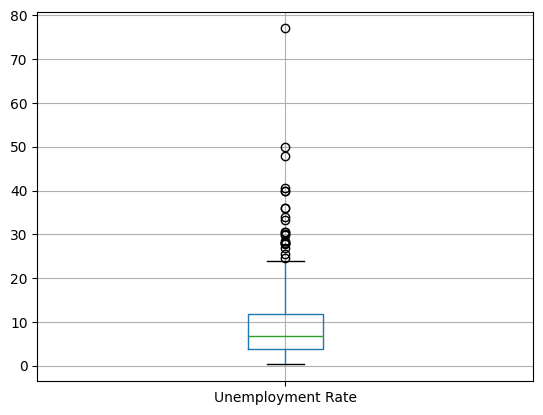

In [21]:
col = 'Unemployment Rate'
df.loc[:,[col]].boxplot()
plt.show()

In [22]:
df[df[col] > 23].sort_values(col)

Name                          Continent  Area (km²)  \
0               Afghanistan                               Asia    652230.0   
93                  Grenada  Central America and the Caribbean       344.0   
155              Mozambique                             Africa    799380.0   
123            Korea, North                               Asia    120538.0   
251                   Yemen                        Middle East    527968.0   
249               West Bank                        Middle East      5860.0   
75                 Eswatini                             Africa     17364.0   
85                    Gabon                             Africa    267667.0   
131                 Lesotho                             Africa     30355.0   
209            South Africa                             Africa   1219090.0   
4            American Samoa                            Oceania       224.0   
133                   Libya                             Africa   1759540.0   
125                  Kosovo                             Europe     10887.0   
122                Kiribati                            Oceania       811.0   
28   Bosnia and Herzegovina                             Europe     51197.0   
156                 Namibia                             Africa    824292.0   
54   Congo, Republic of the                             Africa    342000.0   
144        Marshall Islands                            Oceania       181.0   
66                 Djibouti                             Africa     23200.0   
121                   Kenya                             Africa    580367.0   
100                   Haiti  Central America and the Caribbean     27750.0   
199                 Senegal                             Africa    196722.0   
220                   Syria                        Middle East    187437.0   
36             Burkina Faso                             Africa    274200.0   

     Population  GDP (USD)  Unemployment Rate  Taxes (% of GDP)  \
0    37466414.0       2065              23.90             23.90   
93     113570.0      17039              24.00             24.00   
155  30888034.0       1281              24.50             24.50   
123  25831360.0       1700              25.60             25.60   
251  30399243.0       2500              27.00             27.00   
249   2949246.0       6220              27.90             27.90   
75    1113276.0       8622              28.00             28.00   
85    2284912.0      14950              28.00             28.00   
131   2177740.0       2704              28.10             28.10   
209  56978635.0      12482              28.53             28.53   
4       46366.0      11200              29.80             29.80   
133   7017224.0      15174              30.00             30.00   
125   1935259.0      11368              30.50             30.50   
122    113001.0       2272              30.60             30.60   
28    3824782.0      14912              33.28             33.28   
156   2678191.0       9637              34.00             34.00   
54    5417414.0       3673              36.00             36.00   
144     78831.0       3889              36.00             36.00   
66     938413.0       5535              40.00             40.00   
121  54685051.0       4330              40.00             40.00   
100  11198240.0       2905              40.60             40.60   
199  16082442.0       3395              48.00             48.00   
220  20384316.0       2900              50.00             50.00   
36   21382659.0       2178              77.00             77.00   

     External Debt (USD)  Exchange Rate (USD)  Internet Users  \
0                    7.0               7.8700       4717013.0   
93                  70.4               2.7000         66281.0   
155                102.1              74.1200       2855670.0   
123                  NaN             135.0000             NaN   
251                 74.5             275.0000       7659884.0   
249   

In [23]:
df[df[col] <= 23].sort_values(col).head(10)

Name       Continent  Area (km²)  \
40                            Cambodia  Southeast Asia    181035.0   
164                              Niger          Africa   1267000.0   
128                               Laos  Southeast Asia    236800.0   
143                              Malta          Europe       316.0   
21                             Belarus          Europe    207600.0   
224                           Thailand  Southeast Asia    513120.0   
24                               Benin          Africa    112622.0   
90                           Gibraltar          Europe         7.0   
78   Falkland Islands (Islas Malvinas)   South America     12173.0   
126                             Kuwait     Middle East     17818.0   

     Population  GDP (USD)  Unemployment Rate  Taxes (% of GDP)  \
40   17304363.0       4389               0.30              0.30   
164  23605767.0       1225               0.30              0.30   
128   7574356.0       7826               0.70              0.70   
143    460891.0      44032               0.78              0.78   
21    9441842.0      19150               0.80              0.80   
224  69480520.0      18460               0.99              0.99   
24   13301694.0       3287               1.00              1.00   
90      29516.0      61700               1.00              1.00   
78       3198.0      70800               1.00              1.00   
126   3032065.0      49854               1.10              1.10   

     External Debt (USD)  Exchange Rate (USD)  Internet Users  \
40                  30.4              4.00000       6579808.0   
164                 45.3            605.30000       1110778.0   
128                 63.6              8.00000       1845437.0   
143                 50.7              0.82771        365521.0   
21                  53.4              1.90000       7539145.0   
224                 41.9             30.03000      38987531.0   
24                  54.6            605.30000       2403596.0   
90                   7.5              0.88500         27823.0   
78                   0.0              0.78360          3000.0   
126                 20.6              0.30490       2904801.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
40                                     40.00      16.0        47263.0   
164                                     5.25      30.0        18949.0   
128                                    25.51      41.0        39586.0   
143                                    81.40       1.0         2254.0   
21                                     79.13      65.0        86600.0   
224                                    56.82     101.0       180053.0   
24                                     20.00       6.0        16000.0   
90                                     94.44       1.0           29.0   
78                                     98.30       7.0          440.0   
126                                    99.60       7.0         5749.0   

     Militar Expenditures (% of GDP)  
40                               2.3  
164                              1.8  
128                              0.2  
143                              0.5  
21                               1.2  
224                              1.4  
24                               0.7  
90                               NaN  
78                               NaN  
126                              5.0

### Taxes (% of GDP)	

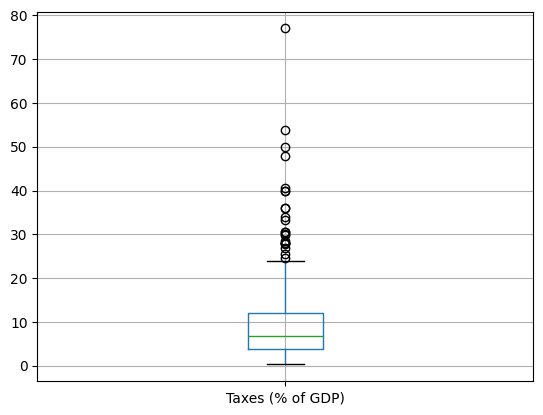

In [24]:
col = 'Taxes (% of GDP)'
df.loc[:,[col]].boxplot()
plt.show()

In [25]:
df[df[col] != df['Unemployment Rate']]

Name                          Continent  \
38                             Burundi                             Africa   
45                                Chad                             Africa   
53   Congo, Democratic Republic of the                             Africa   
82                              France                             Europe   
86                         Gambia, The                             Africa   
98                       Guinea-Bissau                             Africa   
171                               Oman                        Middle East   
192                       Saint Martin  Central America and the Caribbean   
207                    Solomon Islands                            Oceania   
211                        South Sudan                             Africa   
234                             Tuvalu                            Oceania   

     Area (km²)   Population  GDP (USD)  Unemployment Rate  Taxes (% of GDP)  \
38      27830.0   12241065.0        752                NaN               NaN   
45    1284000.0   17414108.0       1580                NaN               NaN   
53    2344858.0  105044646.0       1098                NaN               NaN   
82     643801.0   68084217.0      46184               8.12              53.8   
86      11300.0    2221301.0       2223                NaN               NaN   
98      36125.0    1976187.0       1989                NaN               NaN   
171    309500.0    3694755.0      27299                NaN               NaN   
192        54.0      32680.0      19300                NaN               NaN   
207     28896.0     690598.0       2663                NaN               NaN   
211    644329.0   10984074.0       1600                NaN               NaN   
234        26.0      11448.0       4281                NaN               NaN   

     External Debt (USD)  Exchange Rate (USD)  Internet Users  \
38                  51.7              1.00000        298684.0   
45                  52.5            605.30000       1029153.0   
53                  18.1              1.00000       8231357.0   
82                  96.8              0.82771      55265718.0   
86                  88.0             51.75000        406918.0   
98                  53.9            605.30000         72047.0   
171                 46.9              0.38505       2801932.0   
192                  NaN              0.88500          1100.0   
207                  9.4              8.06126         78686.0   
211                 62.7              0.88500        814326.0   
234                 37.0              1.31100          5498.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
38                                      2.66       7.0        12322.0   
45                                      6.50      59.0        40000.0   
53                                      8.62     198.0       152373.0   
82                                     82.04     464.0        29640.0   
86                                     19.84       1.0         2977.0   
98                                      3.93       8.0         4400.0   
171                                    80.19     132.0        60230.0   
192                                     3.50       1.0            NaN   
207                                    11.92      36.0         1390.0   
211                                     7.98      89.0        90200.0   
234                                    49.32       1.0            8.0   

     Militar Expenditures (% of GDP)  
38                              1.80  
45                              2.20  
53                              0.70  
82                              2.04  
86                              0.80  
98                              1.40  
171                             8.80  
192                              NaN  
207                              NaN  
211                             3.50  
234                              NaN

In [26]:
df = df.drop('Taxes (% of GDP)', axis = 1)

### External Debt (USD)	

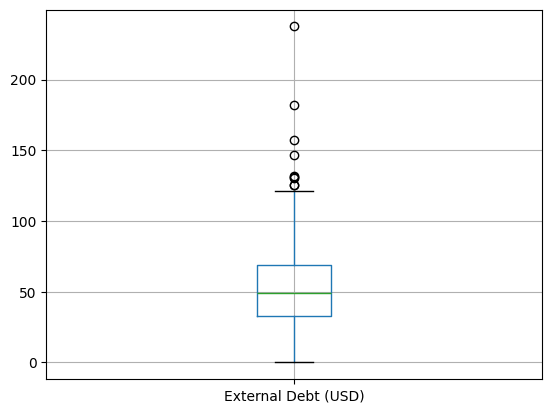

In [27]:
col = 'External Debt (USD)'
df.loc[:,[col]].boxplot()
plt.show()

In [28]:
df[df[col] > 120].sort_values(col)

Name                          Continent  Area (km²)  \
215                   Sudan                             Africa   1861484.0   
182                Portugal                             Europe     92090.0   
39               Cabo Verde                             Africa      4033.0   
54   Congo, Republic of the                             Africa    342000.0   
73                  Eritrea                             Africa    117600.0   
114                   Italy                             Europe    301340.0   
130                 Lebanon                        Middle East     10400.0   
20                 Barbados  Central America and the Caribbean       430.0   
91                   Greece                             Europe    131957.0   
117                   Japan                               Asia    377915.0   

      Population  GDP (USD)  Unemployment Rate  External Debt (USD)  \
215   46751152.0       3958              19.60                121.6   
182   10263850.0      34894               6.55                125.7   
39      589451.0       7172               9.00                125.8   
54     5417414.0       3673              36.00                130.8   
73     6147398.0       1600               5.80                131.2   
114   62390364.0      42492               9.88                131.8   
130    5261372.0      14552               9.70                146.8   
20      301865.0      15639              10.10                157.3   
91    10569703.0      29799              17.30                181.8   
117  124687293.0      41429               2.36                237.6   

     Exchange Rate (USD)  Internet Users  \
215              6.72000      13311404.0   
182              0.82771       7731411.0   
39             101.80000        330623.0   
54             579.80000        437865.0   
73              15.38000         78215.0   
114              0.82771      46305301.0   
130              1.00000       4769039.0   
20               2.00000        239664.0   
91               0.82771       7783381.0   
117            104.20500     106725643.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
215                                    30.87      67.0        31000.0   
182                                    74.66      64.0        82900.0   
39                                     58.17       9.0         1350.0   
54                                      8.65      27.0        23324.0   
73                                      1.31      13.0        16000.0   
114                                    74.39     129.0       487700.0   
130                                    78.18       8.0        21705.0   
20                                     81.76       1.0         1700.0   
91                                     72.95      77.0       117000.0   
117                                    84.59     175.0      1218772.0   

     Militar Expenditures (% of GDP)  
215                             1.60  
182                             1.59  
39                              0.50  
54                              2.70  
73                              5.10  
114                             1.39  
130                             4.20  
20                              0.90  
91                              2.68  
117                             1.00

In [29]:
df[df[col] <= 120].sort_values(col)

Name       Continent  Area (km²)  \
78   Falkland Islands (Islas Malvinas)   South America     12173.0   
137                              Macau  Southeast Asia        28.0   
104                          Hong Kong  Southeast Asia      1108.0   
34                              Brunei  Southeast Asia      5765.0   
225                        Timor-Leste  Southeast Asia     14874.0   
..                                 ...             ...         ...   
155                         Mozambique          Africa    799380.0   
70                               Egypt          Africa   1001450.0   
22                             Belgium          Europe     30528.0   
26                              Bhutan            Asia     38394.0   
203                          Singapore  Southeast Asia       719.0   

      Population  GDP (USD)  Unemployment Rate  External Debt (USD)  \
78        3198.0      70800               1.00                  0.0   
137     630396.0     123965               2.00                  0.0   
104    7263234.0      59848               2.93                  0.1   
34      471103.0      62100               6.90                  2.8   
225    1413958.0       3553               4.40                  3.8   
..           ...        ...                ...                  ...   
155   30888034.0       1281              24.50                102.1   
70   106437241.0      11763               7.86                103.0   
22    11778842.0      51934               5.36                103.4   
26      857423.0      11832               3.20                106.3   
203    5866139.0      97341               2.25                111.1   

     Exchange Rate (USD)  Internet Users  \
78               0.78360          3000.0   
137              8.00000        508052.0   
104              7.75225       6450167.0   
34               1.33685        426234.0   
225              1.00000        363398.0   
..                   ...             ...   
155             74.12000       2855670.0   
70              15.69000      46644728.0   
22               0.82771      10258638.0   
26              64.97000        368714.0   
203              1.33685       5286665.0   

     Internet Users Percentage of Population  Airports  Roadways (km)  \
78                                     98.30       7.0          440.0   
137                                    83.79       1.0          428.0   
104                                    89.42       2.0         2107.0   
34                                     94.60       1.0         2976.0   
225                                    27.49       6.0         6040.0   
..                                       ...       ...            ...   
155                                    10.00      98.0        31083.0   
70                                     46.92      83.0        65050.0   
22                                     88.66      41.0       118414.0   
26                                     48.11       2.0        12205.0   
203                                    88.17       9.0         3500.0   

     Militar Expenditures (% of GDP)  
78                               NaN  
137                              NaN  
104                              NaN  
34                              3.30  
225                             1.00  
..                               ...  
155                             0.90  
70                              1.20  
22                              1.07  
26                               NaN  
203                             3.30  

[199 rows x 13 columns]

### Exchange Rate (USD)	

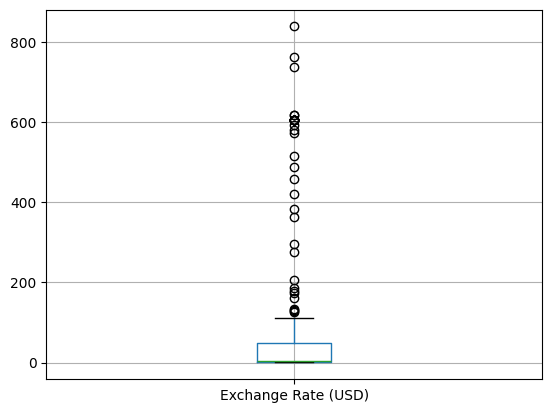

In [30]:
col = 'Exchange Rate (USD)'
df.loc[:,[col]].boxplot()
plt.show()

In [31]:
df[df[col] > 160].sort_values(col)

Name                          Continent  Area (km²)  \
172                  Pakistan                               Asia    796095.0   
6                      Angola                             Africa   1246700.0   
66                   Djibouti                             Africa     23200.0   
214                 Sri Lanka                               Asia     65610.0   
99                     Guyana                      South America    214969.0   
251                     Yemen                        Middle East    527968.0   
105                   Hungary                             Europe     93028.0   
145                Mauritania                             Africa   1030700.0   
165                   Nigeria                             Africa    923768.0   
120                Kazakhstan                               Asia   2724900.0   
52                    Comoros                             Africa      2235.0   
11                    Armenia                               Asia     29743.0   
220                     Syria                        Middle East    187437.0   
57                 Costa Rica  Central America and the Caribbean     51100.0   
54     Congo, Republic of the                             Africa    342000.0   
58              Cote d'Ivoire                             Africa    322463.0   
24                      Benin                             Africa    112622.0   
98              Guinea-Bissau                             Africa     36125.0   
72          Equatorial Guinea                             Africa     28051.0   
85                      Gabon                             Africa    267667.0   
41                   Cameroon                             Africa    475440.0   
44   Central African Republic                             Africa    622984.0   
45                       Chad                             Africa   1284000.0   
36               Burkina Faso                             Africa    274200.0   
164                     Niger                             Africa   1267000.0   
142                      Mali                             Africa   1240192.0   
199                   Senegal                             Africa    196722.0   
226                      Togo                             Africa     56785.0   
46                      Chile                      South America    756102.0   
139                    Malawi                             Africa    118484.0   
187                    Rwanda                             Africa     26338.0   

      Population  GDP (USD)  Unemployment Rate  External Debt (USD)  \
172  238181034.0       4690               6.00                 67.0   
6     33642646.0       6670               6.60                 65.0   
66      938413.0       5535              40.00                 31.8   
214   23044123.0      13078               4.83                 79.1   
99      787971.0      13082              11.10                 52.2   
251   30399243.0       2500              27.00                 74.5   
105    9728337.0      32945               3.45                 73.6   
145    4079284.0       5197              10.20                 96.6   
165  219463862.0       5136              16.50                 21.8   
120   19245793.0      26351               4.80                 20.8   
52      864335.0       3060               6.50                 32.4   
11     3011609.0      13654              18.90                 53.5   
220   20384316.0       2900              50.00                 94.8   
57     5151140.0      19642               8.10                 48.9   
54     5417414.0       3673              36.00                130.8   
58    28088455.0       5213               9.40                 47.0   
24    13301694.0       3287               1.00                 54.6   
98     1976187.0       1989                NaN                 53.9   
72      857008.0      18558               8.60                 37.4   
85     2284912.0      14950              28.

In [32]:
df[df[col] <= 160].sort_values(col)


Name                          Continent  Area (km²)  Population  \
126        Kuwait                        Middle East     17818.0   3032065.0   
18        Bahrain                        Middle East       760.0   1526929.0   
171          Oman                        Middle East    309500.0   3694755.0   
119        Jordan                        Middle East     89342.0  10909567.0   
118        Jersey                             Europe       116.0    101476.0   
..            ...                                ...         ...         ...   
200        Serbia                             Europe     77474.0   6974289.0   
106       Iceland                      Arctic Region    103000.0    354234.0   
115       Jamaica  Central America and the Caribbean     10991.0   2816602.0   
3         Algeria                             Africa   2381740.0  43576691.0   
123  Korea, North                               Asia    120538.0  25831360.0   

     GDP (USD)  Unemployment Rate  External Debt (USD)  Exchange Rate (USD)  \
126      49854               1.10                 20.6              0.30490   
18       45011               3.60                 88.5              0.37705   
171      27299                NaN                 46.9              0.38505   
119      10071              19.10                 95.9              0.70900   
118      56600               4.00                  NaN              0.78360   
..         ...                ...                  ...                  ...   
200      18233              14.10                 62.5            112.40000   
106      55874               3.62                 40.0            127.05000   
115       9762               7.72                101.0            128.36000   
3        11511              11.70                 27.5            131.08500   
123       1700              25.60                  NaN            135.00000   

     Internet Users  Internet Users Percentage of Population  Airports  \
126       2904801.0                                    99.60       7.0   
18        1423039.0                                    98.64       4.0   
171       2801932.0                                    80.19     132.0   
119       6985174.0                                    66.79      18.0   
118         58000.0                                    59.60       1.0   
..              ...                                      ...       ...   
200       5192501.0                                    73.36      26.0   
106        340117.0                                    99.01      96.0   
115       1548618.0                                    55.07      28.0   
3        24819531.0                                    59.58     149.0   
123             NaN                                      NaN      82.0   

     Roadways (km)  Militar Expenditures (% of GDP)  
126         5749.0                              5.0  
18          4122.0                              3.7  
171        60230.0                              8.8  
119         7203.0                              4.7  
118          576.0                              NaN  
..             ...                              ...  
200        44248.0                              2.4  
106        12898.0                              NaN  
115        22121.0                              1.6  
3         104000.0                              6.0  
123        25554.0                             24.0  

[196 rows x 13 columns]

### Internet Users	&& Internet Users Percentage of Population

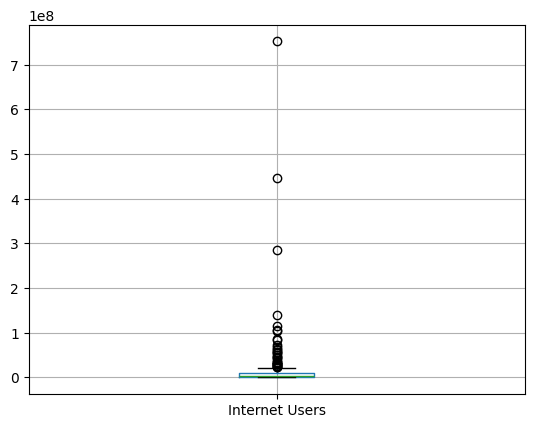

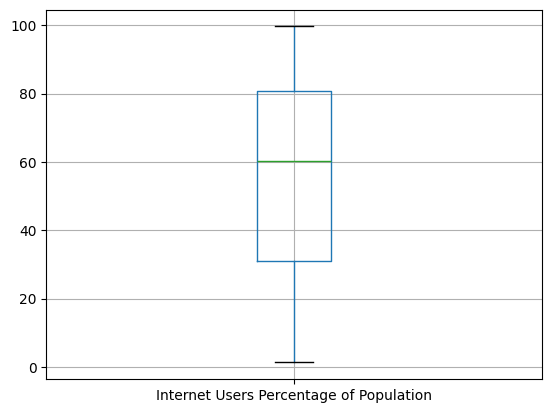

In [33]:
cols = 'Internet Users', 'Internet Users Percentage of Population'
df.loc[:,[cols[0]]].boxplot()
plt.show()
df.loc[:,[cols[1]]].boxplot()
plt.show()

In [48]:
# df = df.drop('Internet Users', axis = 1)
df['Internet Users']/df['Population']*100, df['Internet Users Percentage of Population']

(0      12.589977
 2      71.124973
 3      56.955979
 4      36.664797
 5      91.637574
          ...    
 248    21.765188
 249    90.633335
 251    25.197614
 252    12.326600
 253    25.600951
 Length: 227, dtype: float64,
 0      13.50
 2      71.85
 3      59.58
 4      31.30
 5      91.57
        ...  
 248    22.10
 249    57.40
 251    26.72
 252    14.30
 253    27.06
 Name: Internet Users Percentage of Population, Length: 227, dtype: float64)

### Airports	

### Roadways (km)	

### Militar Expenditures (% of GDP)

### Nombre

El Nombre parece ser un valor único que si razonamos, no deveria tener algo que ver en la desición de si un país tiene un PIB alto, medio o bajo.

In [35]:
df['Name'].nunique() == df.shape[0]


True

In [36]:
# df = df.drop('Name', axis = 1)
df

Name    Continent  Area (km²)  Population  GDP (USD)  \
0          Afghanistan         Asia    652230.0  37466414.0       2065   
2              Albania       Europe     28748.0   3088385.0      13965   
3              Algeria       Africa   2381740.0  43576691.0      11511   
4       American Samoa      Oceania       224.0     46366.0      11200   
5              Andorra       Europe       468.0     85645.0      49900   
..                 ...          ...         ...         ...        ...   
248  Wallis and Futuna      Oceania       142.0     15851.0       3800   
249          West Bank  Middle East      5860.0   2949246.0       6220   
251              Yemen  Middle East    527968.0  30399243.0       2500   
252             Zambia       Africa    752618.0  19077816.0       3470   
253           Zimbabwe       Africa    390757.0  14829988.0       2836   

     Unemployment Rate  External Debt (USD)  Exchange Rate (USD)  \
0                23.90                  7.0               7.8700   
2                 5.83                 71.8             102.4300   
3                11.70                 27.5             131.0850   
4                29.80                 12.2               1.0000   
5                 3.70                 41.0               0.8850   
..                 ...                  ...                  ...   
248               8.80                  5.6             110.2000   
249              27.90                 24.4               3.6060   
251              27.00                 74.5             275.0000   
252              15.00                 63.1              21.0650   
253              11.30                 82.3              82.3138   

     Internet Users  Internet Users Percentage of Population  Airports  \
0         4717013.0                                    13.50      46.0   
2         2196613.0                                    71.85       3.0   
3        24819531.0                                    59.58     149.0   
4           17000.0                                    31.30       3.0   
5           78483.0                                    91.57       NaN   
..              ...                                      ...       ...   
248          3450.0                                    22.10       2.0   
249       2673000.0                                    57.40       2.0   
251       7659884.0                                    26.72      57.0   
252       2351646.0                                    14.30      88.0   
253       3796618.0                                    27.06     196.0   

     Roadways (km)  Militar Expenditures (% of GDP)  
0          34903.0                              1.2  
2           3945.0                              1.3  
3         104000.0                              6.0  
4            241.0                              NaN  
5            320.0                              NaN  
..             ...                              ...  
248            NaN                              NaN  
249         4686.0                              NaN  
251        71300.0                              4.3  
252        67671.0                              1.2  
253        97267.0                              0.7  

[227 rows x 13 columns]

In [37]:
# with open('cia_limpio.csv', 'w') as file:
#     file.write(df.to_csv(index=False))         # Guardamos el archivo limpio para que los índices no 
#                                     # sean un problema
# df = pd.read_csv('cia_limpio.csv', )
# df

## Remplazar GDP por clasificación:

Ingreso bajo: $50 \le GDP \le 5000$

Ingreso medio: $5000 < GDP \le 25000$

Ingreso alto: $25000 < GDP$

In [38]:
ing_bajo_indx  = df[df['GDP (USD)'] <= 5000].index
ing_medio_indx = df[df['GDP (USD)'] <= 25000][df['GDP (USD)'] >  5000].index
ing_alto_indx  = df[df['GDP (USD)'] >  25000].index

df['GDP (USD)'][ing_bajo_indx]  = ['igg_bajo' for _ in range(len(ing_bajo_indx))] 
df['GDP (USD)'][ing_medio_indx] = ['igg_medio' for _ in range(len(ing_medio_indx))] # Hacemos los
df['GDP (USD)'][ing_alto_indx]  = ['igg_alto' for _ in range(len(ing_alto_indx))]   # cambios para
df                                                                                  # las clases

Name    Continent  Area (km²)  Population  GDP (USD)  \
0          Afghanistan         Asia    652230.0  37466414.0   igg_bajo   
2              Albania       Europe     28748.0   3088385.0  igg_medio   
3              Algeria       Africa   2381740.0  43576691.0  igg_medio   
4       American Samoa      Oceania       224.0     46366.0  igg_medio   
5              Andorra       Europe       468.0     85645.0   igg_alto   
..                 ...          ...         ...         ...        ...   
248  Wallis and Futuna      Oceania       142.0     15851.0   igg_bajo   
249          West Bank  Middle East      5860.0   2949246.0  igg_medio   
251              Yemen  Middle East    527968.0  30399243.0   igg_bajo   
252             Zambia       Africa    752618.0  19077816.0   igg_bajo   
253           Zimbabwe       Africa    390757.0  14829988.0   igg_bajo   

     Unemployment Rate  External Debt (USD)  Exchange Rate (USD)  \
0                23.90                  7.0               7.8700   
2                 5.83                 71.8             102.4300   
3                11.70                 27.5             131.0850   
4                29.80                 12.2               1.0000   
5                 3.70                 41.0               0.8850   
..                 ...                  ...                  ...   
248               8.80                  5.6             110.2000   
249              27.90                 24.4               3.6060   
251              27.00                 74.5             275.0000   
252              15.00                 63.1              21.0650   
253              11.30                 82.3              82.3138   

     Internet Users  Internet Users Percentage of Population  Airports  \
0         4717013.0                                    13.50      46.0   
2         2196613.0                                    71.85       3.0   
3        24819531.0                                    59.58     149.0   
4           17000.0                                    31.30       3.0   
5           78483.0                                    91.57       NaN   
..              ...                                      ...       ...   
248          3450.0                                    22.10       2.0   
249       2673000.0                                    57.40       2.0   
251       7659884.0                                    26.72      57.0   
252       2351646.0                                    14.30      88.0   
253       3796618.0                                    27.06     196.0   

     Roadways (km)  Militar Expenditures (% of GDP)  
0          34903.0                              1.2  
2           3945.0                              1.3  
3         104000.0                              6.0  
4            241.0                              NaN  
5            320.0                              NaN  
..             ...                              ...  
248            NaN                              NaN  
249         4686.0                              NaN  
251        71300.0                              4.3  
252        67671.0                              1.2  
253        97267.0                              0.7  

[227 rows x 13 columns]

## Imputing

In [39]:
columnas_por_cambiar = []
for columna in df.columns:
    miss = df[columna].isnull().sum()
    if miss > 0:
        print(f'La columna {columna} tiene {miss} valores faltantes')
        columnas_por_cambiar.append(columna)
    else:
        print(f'La columna {columna} NO tiene valores faltantes!')

La columna Name NO tiene valores faltantes!
La columna Continent NO tiene valores faltantes!
La columna Area (km²) NO tiene valores faltantes!
La columna Population NO tiene valores faltantes!
La columna GDP (USD) NO tiene valores faltantes!
La columna Unemployment Rate tiene 10 valores faltantes
La columna External Debt (USD) tiene 18 valores faltantes
La columna Exchange Rate (USD) NO tiene valores faltantes!
La columna Internet Users tiene 4 valores faltantes
La columna Internet Users Percentage of Population tiene 4 valores faltantes
La columna Airports tiene 5 valores faltantes
La columna Roadways (km) tiene 6 valores faltantes
La columna Militar Expenditures (% of GDP) tiene 62 valores faltantes


In [40]:
columnas_por_cambiar

['Unemployment Rate',
 'External Debt (USD)',
 'Internet Users',
 'Internet Users Percentage of Population',
 'Airports',
 'Roadways (km)',
 'Militar Expenditures (% of GDP)']

In [41]:
from copy import deepcopy

In [42]:
df_ff = df.ffill()                    # rellenado con el método ffill
df_bf = df.bfill()                    # rellenado con el método bfill

df_mf = deepcopy(df)                  # Copia para rellenar con la media de cada columna

for columna in columnas_por_cambiar:
    media = df[columna].mean()
    df_mf[columna].fillna(media, inplace = True)

# Validación cruzada

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
metricas = ['SGDClassifier', 'SVC', 'Decision Trees']

In [45]:
y = df['GDP (USD)']
temp_dict = {

SyntaxError: incomplete input (2197798792.py, line 2)

## Ffill

Data frame llenado con los valores superiores a los faltantes

In [ ]:
df_filled = df_ff
df_filled

In [ ]:
X = pd.get_dummies(df_filled.drop('GDP (USD)', axis = 1))

### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state = 73)

param_grid = {
    'loss': ['log_loss', 'hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 500, 1000],
    'learning_rate': ['constant', 'invscaling'],
    'eta0': [0.01, 0.1, 0.2, 1, 0.001, 0.0001],
    'l1_ratio': [0.1, 0.5, 0.9],
    'tol': [1e-4,1e-3]
}
dummy_parm = {
    'loss': ['log_loss', 'hinge'],
    'penalty': ['l2', 'l1']
}
grid_search = GridSearchCV(sgd_clf, dummy_parm, cv=10, refit='accuracy', error_score='raise', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
grid_search.fit(X, y)

In [ ]:
pd.DataFrame(grid_search.cv_results_).loc[:,['mean_test_accuracy', 'mean_test_presicion', 'mean_test_f1']]

### SVC

### Decision Trees

## Bfill

Data frame llenado con los valores inferiores a los faltantes

## Mfill

Data frame llenado con las medias de cada columna

## Pre-creación del archivo de comparación:

In [ ]:
with open('validacion_cruzada.csv', 'w') as vc:
    vc.write('Métrica,Exactitud,Presición,Sensivilidad,F1\n')
    for i in range(3):
        vc.write(f'Métrica {i+1}: {metricas[i]}' + ','*4 + '\n')

pd.read_csv('validacion_cruzada.csv')